Code reviewed by Richard Carter
Comments: Very nice presentation of the first two datasets with high accuracies for all three datasets. Overall great job breaking up the good and walking the user through the presentation although the third dataset could use some work.

In [1]:
import matplotlib.pyplot as plt
import kNN, logistic, SVM, my_pipelines

# Examining Machine Learning models for regression and classification datasets
### Will Towle & Kostas Mateer

## The Data:
#### Car data: cars classified by acceptability
#### Cancer data: growths classified by diagnosis
#### Energy data: heating and cooling requirements of a building

    

## **Car Dataset**
#### Data process
Data is captured using pandas and the data is encoded to numerical values. The encoders used to encode the data is also returned so they can be used to reverse the encoding.

In [2]:
filename = "car.data"
X, y, encoders = my_pipelines.get_data(filename)

The data is then split into train, test, and validation sub-datasets

In [3]:
X_train, X_test, X_val, y_train, y_test, y_val = my_pipelines.split(X, y)

Now for the training of the model(s):
### **kNN**
The validation datasets were used to iterate over k-values from 1 to 10. 7 and 8 yeilded the  highest accuracy score of ~95% (varries on different splits because of the shuffling algorithm). Observe:

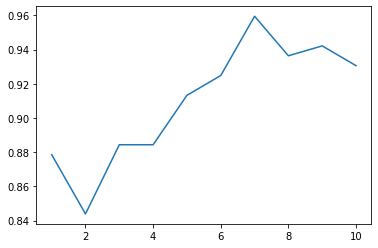

In [4]:
scores = []
for k in range(1, 11):
    model = kNN.fit(X_train, y_train.values.ravel(), k)
    scores.append(kNN.score(model, X_val, y_val.values.ravel()))
    
plt.plot(range(1, 11), scores)

In [5]:
model = kNN.fit(X_train, y_train.values.ravel(), 8)
score = kNN.score(model, X_test, y_test.values.ravel())
print("Accuracy of kNN model when k=8:", str(round(score*100, 2)) + '%')

Accuracy of kNN model when k=8: 93.06%


### **Logistic Regression**
The hyperparameter that was adjusted in this model was the solver algorithm used to train the model. Observe:

In [6]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for solver in solvers:
    model = logistic.fit(X_train, y_train.values.ravel(), solver)
    scores.append(logistic.score(model, X_val, y_val.values.ravel()))

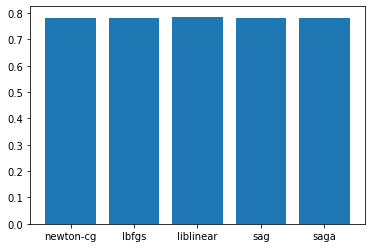

In [7]:
plot = plt.bar(solvers, scores)
plt.show()

It's difficult to see a real difference in performance between these logistic solvers on such a small dataset. However, it was concluded that 'liblinear' consistently yielded slighty better performance.

In [8]:
model = logistic.fit(X_train, y_train.values.ravel(), solver)
score = logistic.score(model, X_test, y_test.values.ravel())
print("Accuracy of logistic model when solver is liblinear:", str(round(score*100, 2)) + '%')

Accuracy of logistic model when solver is liblinear: 68.21%


For the car data, our model selection process determined that kNN with k = 7 or 8 yields the best results

## **Cancer Dataset**
### Data Process
The cancer data is another classification dataset. The data is split into X and y sub-datasets. Because the y is in classes, it must be encoded.

In [9]:
filename = "wdbc.data"
X, y = my_pipelines.get_data(filename)
y, encoders = my_pipelines.encode(y, ["Diagnosis"])

The data now needs to be split and normalized:

In [10]:
X_train, X_test, X_val, y_train, y_test, y_val = my_pipelines.split(X, y)
X_train, X_test, X_val, stdscalers_x = my_pipelines.normalize(X_train, X_test, X_val)

## **Support Vector Machine (SVM)**

In [11]:
model = SVM.fit(X_train, y_train.values.ravel())
score = SVM.score(model, X_val, y_val.values.ravel())
print("Accuracy of SVM with untouched parameters:", str(round(score*100, 2)) + '%')

Accuracy of SVM with untouched parameters: 100.0%


There were very little hyperparameters that were adjustable. One that was adjusted was the regularization parameter, but this adjustment yielded no different results. 

## **Logistic Regression**

In [12]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("error")

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
scores = []
for solver in solvers:
    try:
        model = logistic.fit(X_train, y_train.values.ravel(), solver)
        scores.append(logistic.score(model, X_val, y_val.values.ravel()))
    except ConvergenceWarning:
        scores.append(0)
        print("solver", solver, "threw a ConvergenceWarning")

solver sag threw a ConvergenceWarning
solver saga threw a ConvergenceWarning


Some solvers used on this dataset do not converge. Specifically sag and saga. We will plot the others to examine their effectiveness: 

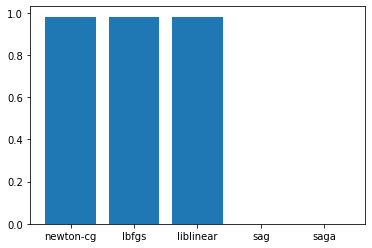

In [13]:
plot = plt.bar(solvers, scores)
plt.show()

Again, there is little-to-no variation in each solver's effectiveness. We will use liblinear.

In [14]:
solver = 'liblinear'
model = logistic.fit(X_train, y_train.values.ravel(), solver)
score = logistic.score(model, X_test, y_test.values.ravel())
print("Accuracy of logistic model when solver is liblinear:", str(round(score*100, 2)) + '%')

Accuracy of logistic model when solver is liblinear: 96.49%


In [15]:
import pandas as pd
import sklearn
import my_pipelines as pipe
import regression
import matplotlib.pyplot as plt

**DATA**

In [16]:
energy_data = pd.read_excel("ENB2012_data.xlsx")
x = energy_data.iloc[:, :-2]
y = energy_data.iloc[:, -2:]
X_train, X_test, X_val, y_train, y_test, y_val, std_scalers = regression.process_data(x, y)

**Linear Regression**

The validation datasets were used to score against the training, to see how well the model did.

In [17]:
model = regression.fit(X_train, y_train)
print("The r2_score of the validation set " + str(regression.score(model, X_val, y_val)))

The r2_score of the validation set -1.5711579798717904e+24


In [18]:
score = regression.score(model, X_test, y_test)
print("Accuracy of the regression model with coefficients: ")
print(model.coef_)
print("Accuracy score (r2_score): " + str(round(score*100, 2)) + "%")

Accuracy of the regression model with coefficients: 
[[-7.10545783e-01  8.08723087e+12 -3.87853811e+12 -8.23228561e+12
   7.25421216e-01 -5.47952877e-03  2.73336800e-01  3.73280422e-02]
 [-8.26982566e-01  8.71273754e+12 -4.17852355e+12 -8.86901153e+12
   7.76795303e-01  1.71107629e-02  2.13089982e-01  1.06151951e-02]]
Accuracy score (r2_score): -1.494288649469789e+25%


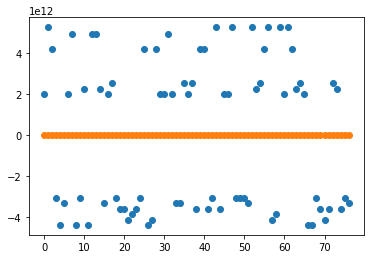

In [19]:
y_pred = model.predict(X_test)

unorm_y_pred = std_scalers[1][1].inverse_transform(y_pred)
unorm_y_test = std_scalers[1][1].inverse_transform(y_test)
unorm_y_pred1 = unorm_y_pred[:,0]
unorm_y_pred2 = unorm_y_pred[:,1]
unorm_y_test1 = unorm_y_test[:,0]
unorm_y_test2 = unorm_y_test[:,1]
minimum = round(min(unorm_y_test1))
maximum = round(max(unorm_y_test1))
plt.scatter(range(unorm_y_pred1.size), unorm_y_pred1)
plt.scatter(range(unorm_y_pred1.size), unorm_y_test1)

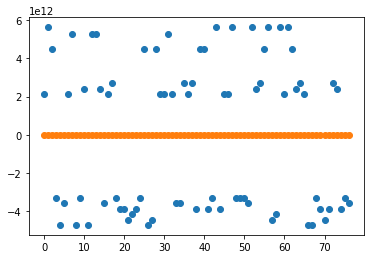

In [20]:
plt.clf()
plt.scatter(range(unorm_y_pred2.size), unorm_y_pred2)
plt.scatter(range(unorm_y_pred2.size), unorm_y_test2)

Plots show are close the predictions were to the actual test values.

Chose this way of displaying the data because cannot plot the regression since it is a multidimensional regression

**DecisionTreeRegressor**

Utilized `RandomSearchCV` to find the best hyperparameters

Hyperparameter is shown by the following:

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
reg = tree.DecisionTreeRegressor()
parameters = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
              'splitter' : ['best', 'random'],
              'max_depth' : sp_randInt(1, X_train.size),
              'min_samples_split' : sp_randInt(2, 100),
              'min_samples_leaf' : sp_randInt(1, 100),
              'min_weight_fraction_leaf' : sp_randFloat(0, 0.5),
             }
clf = RandomizedSearchCV(reg, parameters)
search = clf.fit(X_train, y_train)
print(search.best_params_)
search.best_score_

{'criterion': 'squared_error', 'max_depth': 1779, 'min_samples_leaf': 16, 'min_samples_split': 34, 'min_weight_fraction_leaf': 0.13586646976933492, 'splitter': 'best'}


0.9018954354088153

In [22]:
param = search.best_params_
model = regression.fitdecisiontree(X_train, y_train, param)
print("The r2_score of the validation set " + str(regression.score(model, X_val, y_val)))

The r2_score of the validation set 0.9421204700172606


In [23]:
print("The r2_score of the test set " + str(regression.score(model, X_test, y_test)))

The r2_score of the test set 0.9009521726458111


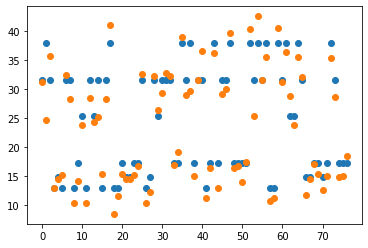

In [24]:
y_pred = model.predict(X_test)

unorm_y_pred = std_scalers[1][1].inverse_transform(y_pred)
unorm_y_test = std_scalers[1][1].inverse_transform(y_test)
unorm_y_pred1 = unorm_y_pred[:,0]
unorm_y_pred2 = unorm_y_pred[:,1]
unorm_y_test1 = unorm_y_test[:,0]
unorm_y_test2 = unorm_y_test[:,1]
minimum = round(min(unorm_y_test1))
maximum = round(max(unorm_y_test1))
plt.scatter(range(unorm_y_pred1.size), unorm_y_pred1)
plt.scatter(range(unorm_y_pred1.size), unorm_y_test1)

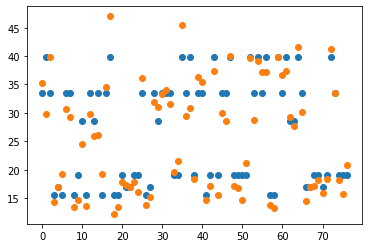

In [25]:
plt.clf()
plt.scatter(range(unorm_y_pred2.size), unorm_y_pred2)
plt.scatter(range(unorm_y_pred2.size), unorm_y_test2)

Once again one can see how close or off the predicted values were to the test